In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v2'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Residual autoencoder

In [7]:
encoding_dim = 32

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(128, activation='relu')(encoded_1)

residual_1 = layers.Dense(128)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 ###
encoded_4 = layers.Dense(64, activation='relu')(dropout_1)


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_4)


### decoder 1 ###
decoded_1 = layers.Dense(64, activation='relu')(latent_space)

### decoder 2 residual ###
decoded_2 = layers.Dense(128, activation='relu')(decoded_1)
decoded_3 = layers.Dense(256, activation='relu')(decoded_2)

residual_2 = layers.Dense(256)(decoded_1)
decoded_4 = layers.add([decoded_3, residual_2])

### output ###
decoded_5 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_4)



autoencoder = keras.Model(input_label, decoded_5)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

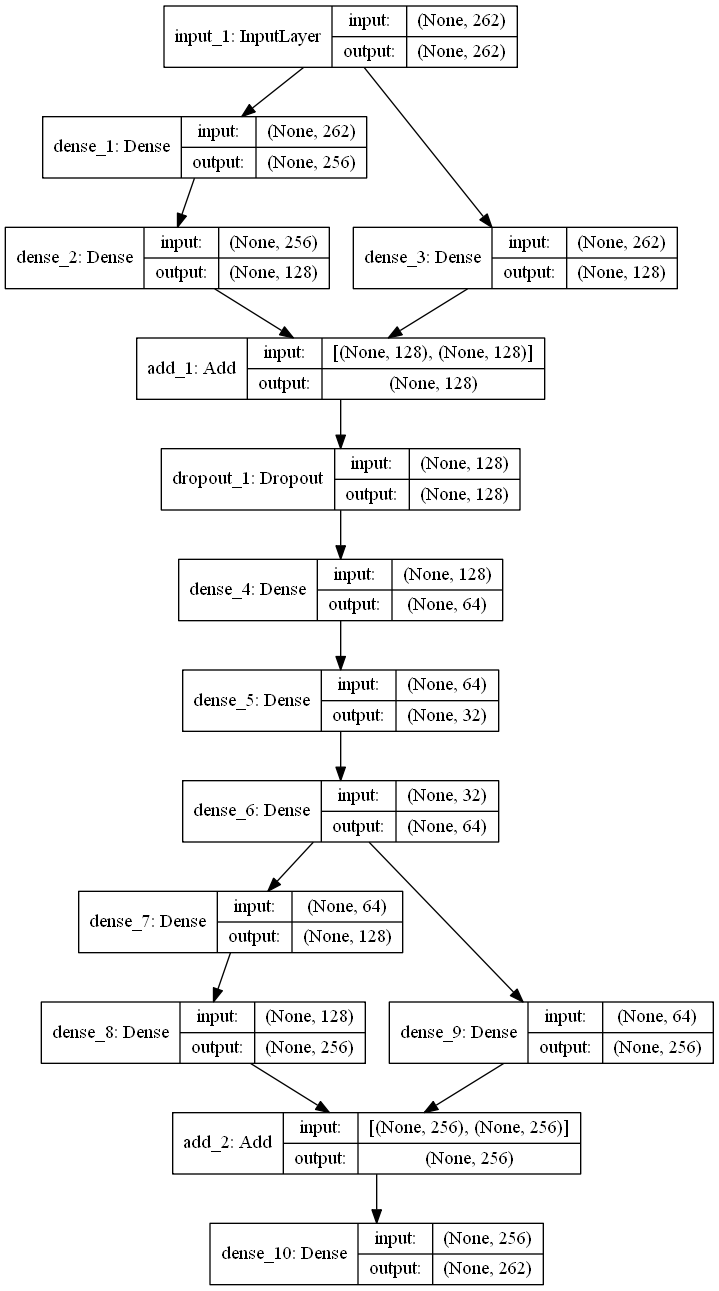

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_ls32_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

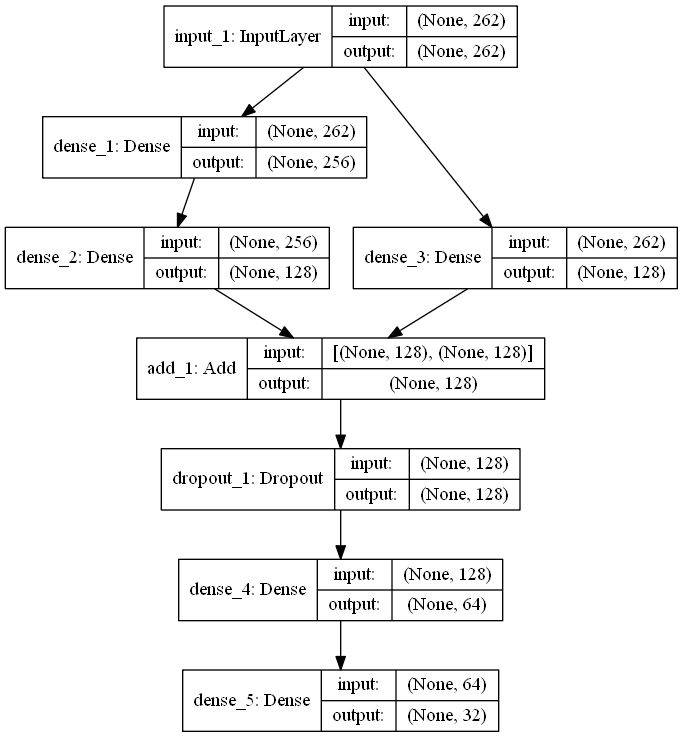

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_ls32_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 ###
decoder_layer1 = autoencoder.layers[-6](decoded_input)

### decoder 1 residual ###
decoder_layer2 = autoencoder.layers[-5](decoder_layer1)
decoder_layer3 = autoencoder.layers[-4](decoder_layer2)
decoder_residual1 = autoencoder.layers[-3](decoder_layer1)
decoder_layer4 = autoencoder.layers[-2]([decoder_layer3, decoder_residual1])

### output ###
decoder_layer5 = autoencoder.layers[-1](decoder_layer4)


decoder = keras.Model(decoded_input, decoder_layer5)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 64)           2112        input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          8320        dense_6[1][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 256)          33024       dense_7[1][0]                    
____________________________________________________________________________________________

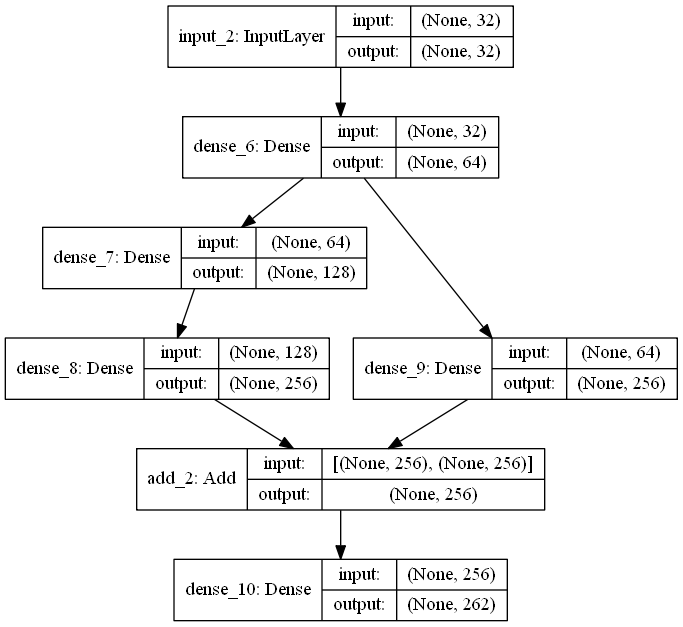

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_ls32_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/RAE_ls32_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 255us/step - loss: 0.2376 - val_loss: 0.0403

Epoch 00001: saving model to ./trained_model/RAE_ls32_v2-01-0.04027.h5
Epoch 2/300
2805/2805 [==============================] - 0s 71us/step - loss: 0.0376 - val_loss: 0.0360

Epoch 00002: saving model to ./trained_model/RAE_ls32_v2-02-0.03602.h5
Epoch 3/300
2805/2805 [==============================] - 0s 76us/step - loss: 0.0345 - val_loss: 0.0341

Epoch 00003: saving model to ./trained_model/RAE_ls32_v2-03-0.03412.h5
Epoch 4/300
2805/2805 [==============================] - 0s 72us/step - loss: 0.0323 - val_loss: 0.0315

Epoch 00004: saving model to ./trained_model/RAE_ls32_v2-04-0.03145.h5
Epoch 5/300
2805/2805 [==============================] - 0s 73us/step - loss: 0.0297 - val_loss: 0.0290

Epoch 00005: saving model to ./trained_model/RAE_ls32_v2-05-0.02901.h5
Epoch 6/300
2805/2805 [==============================] - 0s 72us/step - 

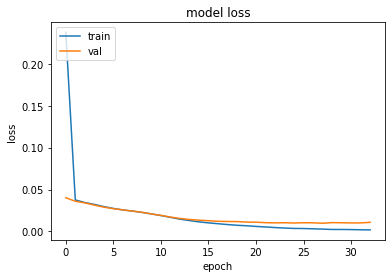

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_ls32_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_ls32_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[2.721272  , 0.64589626, 4.298009  , ..., 0.5652358 , 0.        ,
        1.0637488 ],
       [1.959765  , 0.6266017 , 4.5171227 , ..., 1.1553918 , 0.99646187,
        1.7452358 ],
       [1.9573255 , 3.5218632 , 2.2221904 , ..., 1.1943856 , 2.7180872 ,
        3.6416292 ],
       ...,
       [2.7144542 , 1.6737882 , 0.        , ..., 0.7422901 , 3.0416589 ,
        1.1978155 ],
       [3.2132478 , 0.9959459 , 2.7978706 , ..., 0.02785845, 1.6012096 ,
        2.5772095 ],
       [2.200617  , 0.84291583, 2.4978282 , ..., 0.81160504, 2.201858  ,
        3.0676765 ]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,...,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2.107296,1.857816,2.544940,0.514931,2.068967,0.000774,1.926651,1.611656,1.464054,2.306580,...,1.607926,2.436868,2.860311,2.381053,3.492788,2.508437,1.828812,1.096341,1.329910,1.690023
std,0.993156,1.148711,1.376464,0.429634,1.051765,0.014890,1.043527,1.043352,1.015351,1.188924,...,0.936492,1.396600,1.511228,1.102465,1.820926,1.421393,1.111670,0.636047,0.901877,1.037372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.387571,0.999378,1.553329,0.109383,1.316930,0.000000,1.184833,0.878567,0.640941,1.501756,...,0.912321,1.435049,1.899451,1.565534,2.228808,1.432610,1.008446,0.625010,0.663699,0.878684
50%,2.107951,1.778581,2.632541,0.447607,2.103842,0.000000,1.903160,1.555960,1.514341,2.362531,...,1.571257,2.473988,2.728865,2.293063,3.465574,2.523546,1.853937,1.063173,1.317709,1.745236
75%,2.831361,2.639253,3.448546,0.833281,2.857344,0.000000,2.771934,2.407779,2.191672,3.112153,...,2.292558,3.293540,3.830574,3.076643,4.824238,3.449069,2.608316,1.508949,1.897644,2.317010
max,4.873512,6.256203,6.633139,1.989910,5.524066,0.332284,4.656950,5.059135,4.320338,5.657207,...,4.334181,7.309160,7.525425,6.309410,8.936745,7.220611,5.003489,3.405107,4.333757,5.989281


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

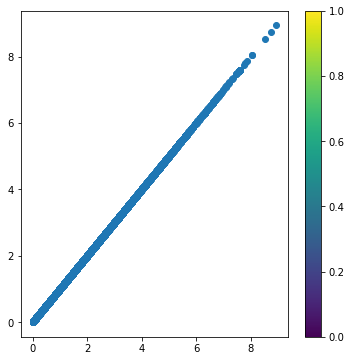

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[2.18972161e-07, 4.17080780e-12, 9.98565733e-01, ...,
        2.21556450e-19, 9.60026973e-15, 6.64932713e-08],
       [7.02974907e-27, 4.80370407e-19, 3.36126835e-15, ...,
        1.67048957e-19, 7.09013106e-19, 6.88823130e-13],
       [3.98853365e-21, 6.24910745e-09, 3.30390643e-32, ...,
        1.64213234e-05, 8.61061999e-22, 1.94860499e-16],
       ...,
       [2.47453533e-13, 6.90957166e-14, 1.06635298e-05, ...,
        1.36100989e-16, 8.61951163e-14, 1.71907641e-13],
       [1.40057750e-07, 9.82582726e-09, 3.38364448e-09, ...,
        1.00947419e-08, 1.75478515e-13, 3.98118826e-15],
       [4.45727609e-14, 4.22357158e-12, 1.08718226e-08, ...,
        1.22755983e-08, 4.79875649e-20, 3.99086078e-14]], dtype=float32)

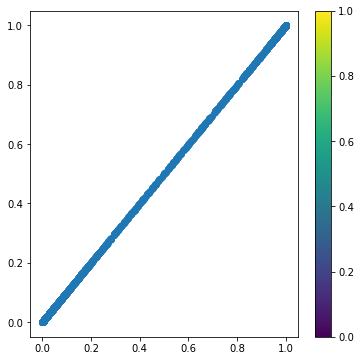

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[932,   1],
        [  0,   2]],

       [[928,   0],
        [  1,   6]],

       [[873,   1],
        [ 13,  48]],

       ...,

       [[931,   1],
        [  0,   3]],

       [[934,   0],
        [  0,   1]],

       [[933,   1],
        [  0,   1]]], dtype=int64)

In [31]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.7647058823529411
precision :  0.9171309192200557
recall :  0.7928958458759783
f1 :  0.8505004843396835
hamming_loss :  0.0018900273502877904


In [32]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.7647058823529411
precision :  0.9096052966641203
recall :  0.8665953654188948
f1 :  0.8773904467487356
hamming_loss :  0.0018900273502877904


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [34]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [35]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'